# Database Engineering

In [8]:
!rm hawaii.sqlite

In [46]:
#import modules
import pandas as pd
import csv
import numpy as np

# Imports the method used for connecting to DBs
from sqlalchemy import create_engine, MetaData, inspect, func, distinct

# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float 

# PyMySQL 
import pymysql
pymysql.install_as_MySQLdb()

Base = declarative_base()

# Use the engine and connection string to create a database called hawaii.sqlite.

engine = create_engine("sqlite:///hawaii.sqlite")
#Base.metadata.create_all(engine)
conn = engine.connect()

from sqlalchemy.orm import Session
session = Session(bind=engine)

In [10]:
#Measurements.__table__.drop()
#Stations.__table__.drop()

In [11]:
# read in files
clean_stations_csv = pd.read_csv('clean_stations.csv')
clean_stations_csv.head()

,Unnamed: 0,station,name,latitude,longitude,elevation
0,0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [12]:
# drop inherited index column
clean_stations = clean_stations_csv.drop('Unnamed: 0',axis = 1)
clean_stations

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [13]:
clean_measurements_csv = pd.read_csv('clean_measurements.csv')
clean_measurements_csv.head()

,Unnamed: 0,station,date,prcp,tobs
0,0,USC00519397,2010-01-01,0.08,65
1,1,USC00519397,2010-01-02,0.00,63
2,2,USC00519397,2010-01-03,0.00,74
3,3,USC00519397,2010-01-04,0.00,76
4,5,USC00519397,2010-01-07,0.06,70


In [14]:
#drop inherited index
clean_measurements = clean_measurements_csv.drop('Unnamed: 0',axis = 1)
clean_measurements

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-07,0.06,70
5,USC00519397,2010-01-08,0.00,64
6,USC00519397,2010-01-09,0.00,68
7,USC00519397,2010-01-10,0.00,73
8,USC00519397,2010-01-11,0.01,64
9,USC00519397,2010-01-12,0.00,61


In [15]:
# Use declarative_base and create ORM classes for each table.
#You will need a class for Measurement and for Station. Make sure to define your primary keys.

class Measurements(Base):
    __tablename__ = "measurements"
    id = Column(Integer, primary_key=True)
    station = Column(String)
    date = Column(String)
    prcp = Column(Float) # precipitation
    tobs = Column(Integer)



In [16]:
# Use `create_all` to create the measurements table in the database
Base.metadata.create_all(engine)

In [17]:
# insert data into classes
counter = 0
for i, record in clean_measurements.iterrows():
    obj = Measurements(
       # record['id'],
        station = record['station'],
        date = record['date'],
        prcp = record['prcp'],
        tobs = record['tobs']
    ) 
    session.add(obj)

session.commit()

In [18]:
#Create class Station
class Station(Base):
    __tablename__ = "stations"
    id = Column(Integer, primary_key=True)
    station = Column(String)
    name = Column(String)
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)
    


In [19]:
# Use `create_all` to create the station table in the database
Base.metadata.create_all(engine)

In [20]:
# insert data into station class
counter = 0
for i, record in clean_stations.iterrows():
    obj = Station(
       # record['id'],
        station = record['station'],
        name = record['name'],
        latitude = record['latitude'],
        longitude = record['longitude'],
        elevation = record['elevation']
    ) 
    session.add(obj)

session.commit()

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

Base.classes.keys()

['measurements', 'stations']

In [22]:
# Save reference to the table
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [23]:
session.query(Measurements).all()

 ...]

# Precipitation Analysis

In [24]:
# Total dates
session.query(func.count(Measurements.date)).all()

[(18103)]

In [25]:
# Earliest Date
session.query(Measurements.date).order_by(Measurements.date).first()

('2010-01-01')

In [26]:
# Latest Date
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23')

In [27]:
import datetime as dt

In [28]:
# date 1 year ago from today
year_ago = dt.date.today() - dt.timedelta(days=365)

In [29]:
year_ago_dates = session.query(Measurements.date).\
    filter(Measurements.date > year_ago).\
    order_by(Measurements.date).all()

In [30]:
# query date and prec
date_prcp = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date > year_ago).\
    order_by(Measurements.date).all()

In [31]:
#create dataframe
date_prcp_df = pd.DataFrame(date_prcp)
date_prcp_df.head(10)

,date,prcp
0,2017-04-08,0.00
1,2017-04-08,0.00
2,2017-04-08,0.00
3,2017-04-09,0.00
4,2017-04-09,0.00
5,2017-04-09,0.00
6,2017-04-09,0.00
7,2017-04-10,0.00
8,2017-04-10,0.01
9,2017-04-10,0.00


In [32]:
date_prcp_new = date_prcp_df.set_index('date')
date_prcp_new.head(10)

,prcp
date,
2017-04-08,0.00
2017-04-08,0.00
2017-04-08,0.00
2017-04-09,0.00
2017-04-09,0.00
2017-04-09,0.00
2017-04-09,0.00
2017-04-10,0.00
2017-04-10,0.01


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

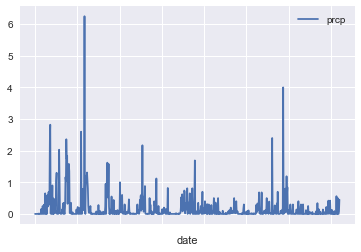

In [49]:
date_prcp_new.plot()

#plt.xticks(np.arange(12))
sns.set()
plt.show()


In [35]:
# summary table with pandas

#Average, min, max precipation 
avg_prcp = round(date_prcp_new["prcp"].mean(),2)
min_prcp = round(date_prcp_new["prcp"].min(),2)
max_prcp = round(date_prcp_new["prcp"].max(),2)


In [36]:
#summary table
prc_summary = pd.DataFrame({"Average Precipiation": [avg_prcp],
"Minimum Precipation": [min_prcp],
"Maximum Precipation": [max_prcp]
                           })
prc_summary

,Average Precipiation,Maximum Precipation,Minimum Precipation
0,0.18,6.25,0.0


# Station Analysis

In [37]:
# Total num of stations
session.query(func.count(distinct(Measurements.station))).all()

[(9)]

In [38]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order
# Which station has the highest number of observations?
tobs_order = (session
.query(Measurements.station, func.count(Measurements.station))
.group_by(Measurements.station)
.order_by(func.count(Measurements.station).desc()).all())

In [39]:
tobs_order

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

## Design a query to retrieve the last 12 months of temperature observation data (tobs).

Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.

In [72]:
# query date and tobs
date_tobs = session.query(Measurements.tobs).\
    filter(Measurements.date > year_ago).\
    filter(Measurements.station == 'USC00519281').\
    order_by(Measurements.date).all()
date_tobs1 = np.ravel(date_tobs)
date_tobs1

array([77, 78, 67, 70, 69, 69, 74, 78, 71, 67, 68, 67, 76, 69, 72, 76, 68,
       72, 74, 70, 67, 72, 60, 65, 75, 70, 75, 70, 79, 75, 70, 67, 74, 70,
       75, 76, 77, 74, 74, 74, 69, 68, 76, 74, 71, 71, 74, 74, 74, 74, 80,
       74, 72, 75, 80, 76, 76, 77, 75, 75, 75, 75, 72, 74, 74, 74, 76, 74,
       75, 73, 79, 75, 72, 72, 74, 72, 72, 77, 71, 73, 76, 77, 76, 76, 79,
       81, 76, 78, 77, 74, 75, 78, 78, 69, 72, 74, 74, 76, 80, 80, 76, 76,
       76, 77, 77, 77, 82, 75, 77, 75, 76, 81, 82, 81, 76, 77, 82, 83, 77,
       77, 77, 76, 76, 79])

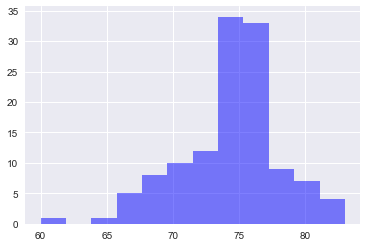

In [73]:
# plot the histogram

num_bins = 12
#x_axis = np.arange(60,80)

plt.hist(date_tobs1, num_bins, facecolor='blue', alpha=0.5)
sns.set()
plt.show()


## Temperature Analysis
- Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

- Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

- Plot the min, avg, and max temperature from your previous query as a bar chart.
    - Use the average temperature as the bar height.
    - Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [79]:
sel = [func.min(Measurements.tobs), 
       func.avg(Measurements.tobs), 
       func.max(Measurements.tobs)]
calc_temps = session.query(*sel).\
    filter(func.strftime("%Y-%m-%d", Measurements.date) == "2017-04-08").\
    group_by(Measurements.date).\
    order_by(Measurements.date).all()
    
calc_temps1 = np.ravel(calc_temps)
calc_temps1

array([73.        , 75.66666667, 77.        ])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


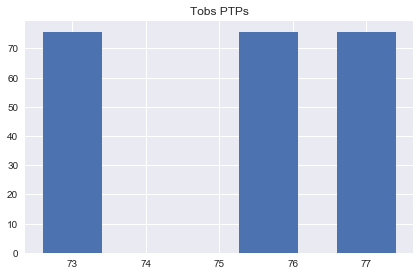

In [83]:

fig, ax = plt.subplots()
height = 75.67

x = range(len(calc_temps1))
ax.bar(calc_temps1, height)
ax.set_title('Tobs PTPs')
fig.tight_layout()
fig.show()
### END SOLUTION